In [1]:
# grafics.py

import pandas as pd
import seaborn as sns

In [8]:
dados = pd.read_csv("../all.csv")
dados.Score = dados.Score.str.replace(',', '.').astype(float)
dados.Benchmark = dados.Benchmark.str.removeprefix("jv.microbenchmark.runners.tfidf.")
dados["Class"] = dados.Benchmark.str.split("Runner.").str[0]
dados["Benchmark"] = dados.Benchmark.str.split("Runner.").str[1]
dados.dropna(subset = ['Score'], inplace=True) 
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 0 to 1185
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Benchmark                  1186 non-null   object 
 1   Mode                       1186 non-null   object 
 2   Threads                    1186 non-null   int64  
 3   Samples                    1186 non-null   int64  
 4   Score                      1186 non-null   float64
 5   Score Error (99,9%)        938 non-null    object 
 6   Unit                       1186 non-null   object 
 7   Param: dataset             1186 non-null   object 
 8   Param: stringManipulation  1186 non-null   object 
 9   Class                      1186 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 92.8+ KB


In [9]:
dados.head()

,Benchmark,Mode,Threads,Samples,Score,"Score Error (99,9%)",Unit,Param: dataset,Param: stringManipulation,Class
0,compute_df,thrpt,1,10,2.909356e+01,"0,877501",ops/s,devel_1_000_id,foreach_java,BasicSerial
1,compute_df:·gc.alloc.rate,thrpt,1,10,3.570268e+02,"10,776616",MB/sec,devel_1_000_id,foreach_java,BasicSerial
2,compute_df:·gc.alloc.rate.norm,thrpt,1,10,1.353661e+07,"1645,431373",B/op,devel_1_000_id,foreach_java,BasicSerial
3,compute_df:·gc.churn.G1_Eden_Space,thrpt,1,10,3.539514e+02,"12,242963",MB/sec,devel_1_000_id,foreach_java,BasicSerial
4,compute_df:·gc.churn.G1_Eden_Space.norm,thrpt,1,10,1.341952e+07,"132297,007737",B/op,devel_1_000_id,foreach_java,BasicSerial


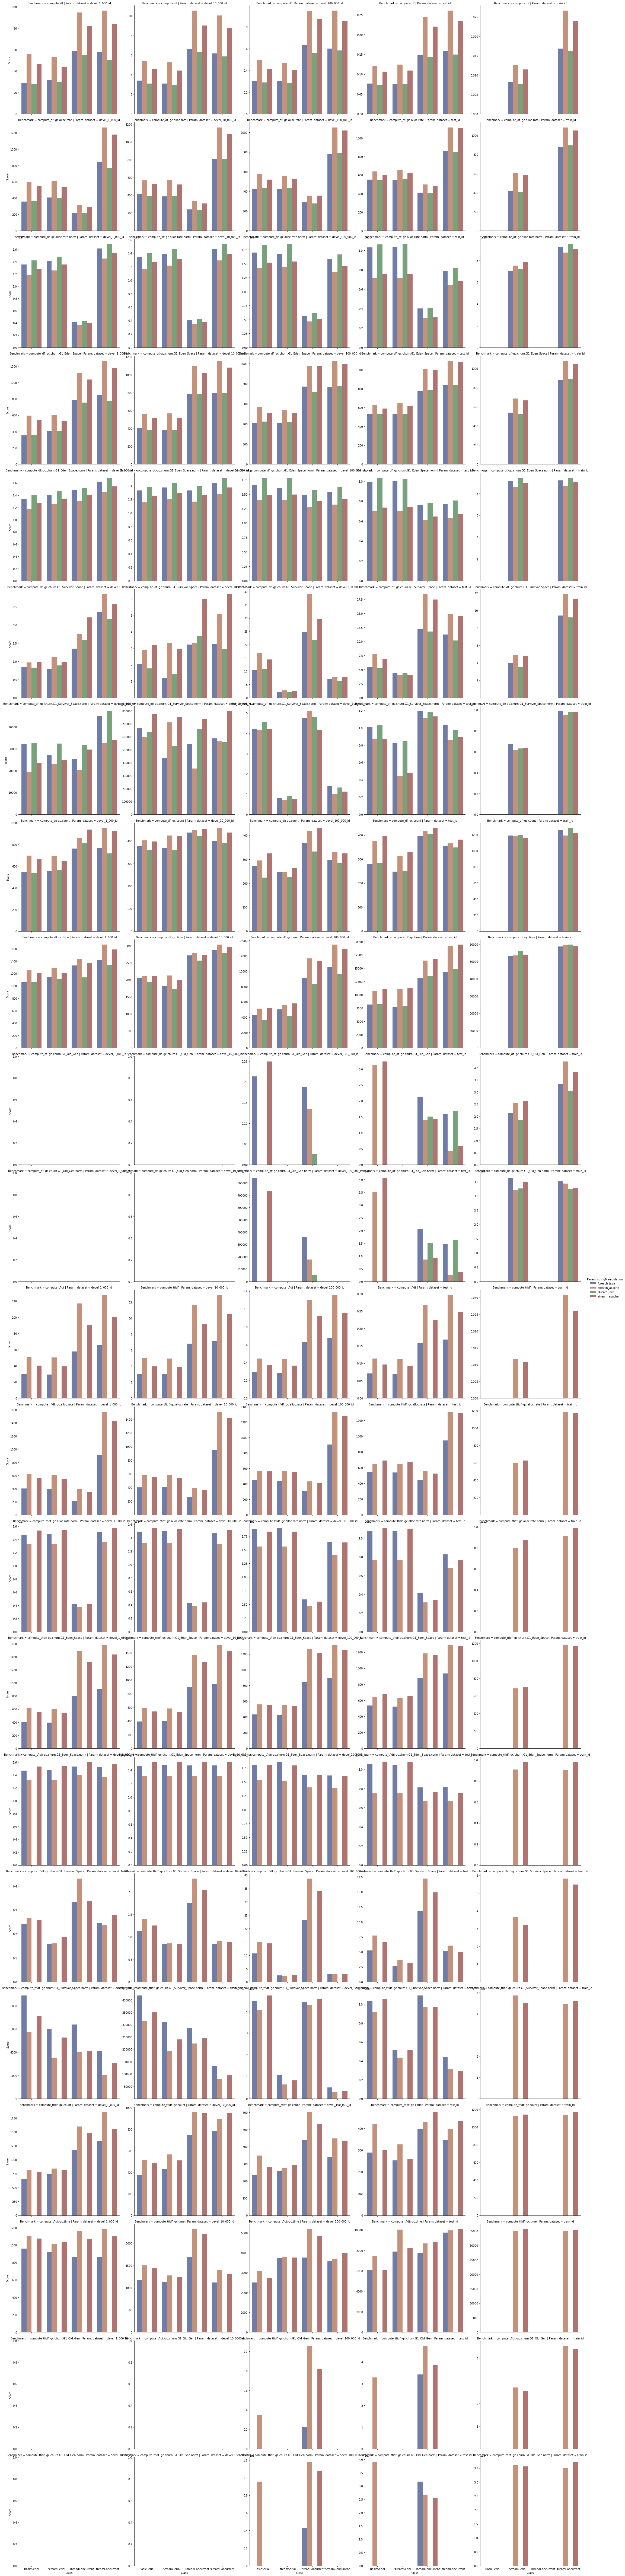

In [10]:
g = sns.catplot(
    data=dados, kind="bar", col="Param: dataset", row="Benchmark",
    x="Class", y="Score", hue="Param: stringManipulation",
    ci="sd", palette="dark", alpha=.6, height=6, sharey=False,
    order=['BasicSerial', 'StreamSerial', 'ThreadConcurrent', 'StreamConcurrent']
)